In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

%matplotlib inline
%precision 4

'%.4f'

In [84]:
#load the file
file_name = r"C:\Users\utente\AppData\Local\Packages\CanonicalGroupLimited.Ubuntu18.04onWindows_79rhkp1fndgsc\LocalState\rootfs\home\beppe\LCP_projects_Y3\SouthCalifornia-1982-2011_Physics-of-Data.dat"
df = pd.read_csv(file_name, sep='\s+', usecols=[i for i in range(0,7,1)], 
                 names=['index','trigger','time','magnitude','x','y','z'])

#convert the seconds in hours
df['time'] = pd.to_datetime(df['time'], unit='s').astype('datetime64[ms]')
df.sort_values(by='time')

,index,trigger,time,magnitude,x,y,z
0,0,-1,1970-01-01 00:00:00.000,2.71,-2571956,-4627162,3520602
1,1,0,1970-01-01 10:08:21.390,2.12,-2363740,-4787011,3461373
2,2,0,1970-01-01 10:24:48.277,2.33,-2363746,-4786942,3461232
3,3,0,1970-01-01 13:19:42.516,2.57,-2475085,-4664024,3548479
4,4,0,1970-01-01 16:44:28.570,2.98,-2238642,-4839098,3469546
...,...,...,...,...,...,...,...
110266,110266,-1,1999-06-27 16:06:08.170,2.60,-2668492,-4335735,3810743
110267,110267,-1,1999-06-27 19:25:04.728,2.02,-2297480,-4823870,3445285
110268,110268,-1,1999-06-28 01:03:15.733,2.00,-2404797,-4441247,3868121
110269,110269,-1,1999-06-28 02:17:48.600,2.17,-2388375,-4691191,3550903


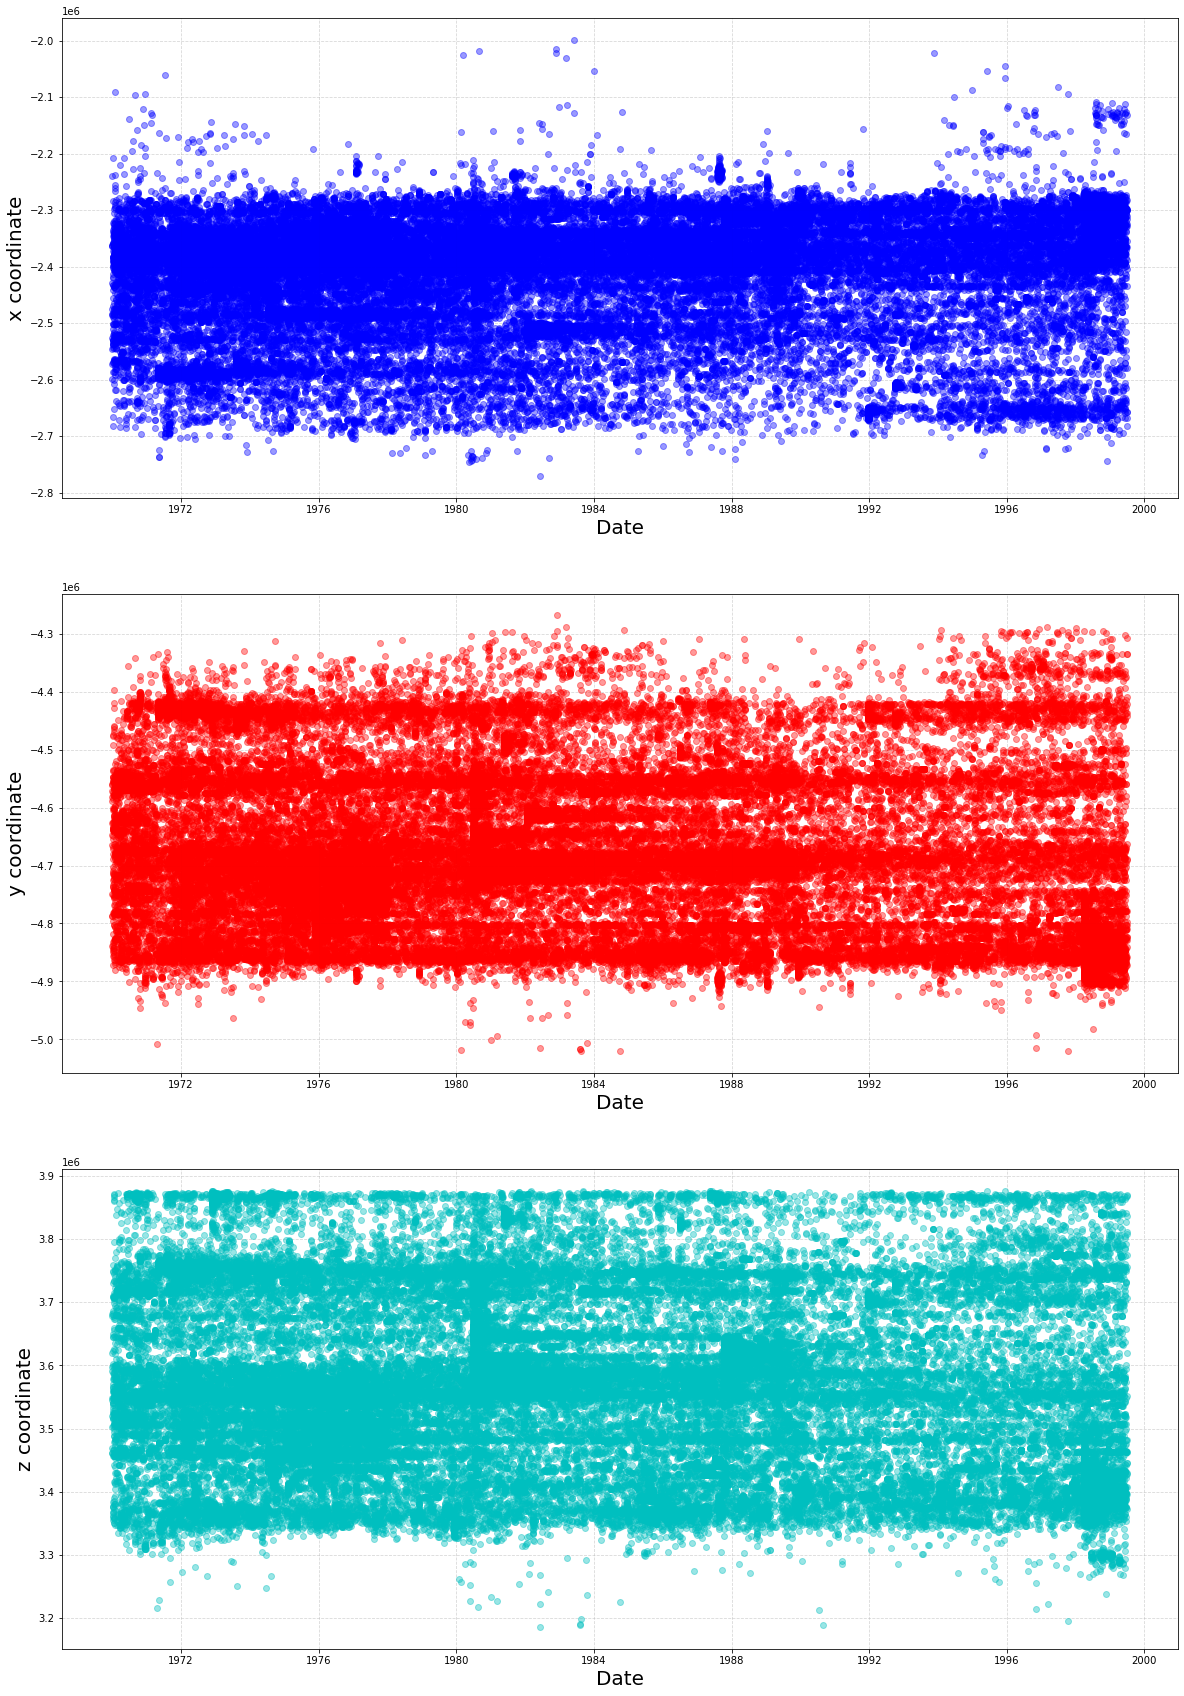

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 30))

ax1.plot(df['time'], df['x'], 'o', alpha=0.4, color='b')
ax1.set_xlabel('Date', fontsize=20)
ax1.set_ylabel('x coordinate', fontsize=20)
ax1.grid(True, alpha=0.5, linestyle='--')

ax2.plot(df['time'], df['y'], 'o', alpha=0.4, color='r')
ax2.set_xlabel('Date', fontsize=20)
ax2.set_ylabel('y coordinate', fontsize=20)
ax2.grid(True, alpha=0.5, linestyle='--')

ax3.plot(df['time'], df['z'], 'o', alpha=0.4, color='c')
ax3.set_xlabel('Date', fontsize=20)
ax3.set_ylabel('z coordinate', fontsize=20)
ax3.grid(True, alpha=0.5, linestyle='--')

In [76]:
def waiTime(start, end, datafr):
    return (datafr['time'][end] - datafr['time'][start])

def dist(one, two, datafr):
    coord = ['x', 'y', 'z']
    return round(np.sqrt(np.array([(datafr[c][two] - datafr[c][one])**2 for c in coord]).sum()), 4)

In [77]:
print(waiTime(0,1,df))
print(dist(0,1,df))

0 days 10:08:21.390000
269097.9002


In [140]:
df['event'] = df['trigger'].where(df['trigger'] != -1, df['index'])
df

,index,trigger,time,magnitude,x,y,z,event
0,0,-1,1970-01-01 00:00:00.000,2.71,-2571956,-4627162,3520602,0
1,1,0,1970-01-01 10:08:21.390,2.12,-2363740,-4787011,3461373,0
2,2,0,1970-01-01 10:24:48.277,2.33,-2363746,-4786942,3461232,0
3,3,0,1970-01-01 13:19:42.516,2.57,-2475085,-4664024,3548479,0
4,4,0,1970-01-01 16:44:28.570,2.98,-2238642,-4839098,3469546,0
...,...,...,...,...,...,...,...,...
110266,110266,-1,1999-06-27 16:06:08.170,2.60,-2668492,-4335735,3810743,110266
110267,110267,-1,1999-06-27 19:25:04.728,2.02,-2297480,-4823870,3445285,110267
110268,110268,-1,1999-06-28 01:03:15.733,2.00,-2404797,-4441247,3868121,110268
110269,110269,-1,1999-06-28 02:17:48.600,2.17,-2388375,-4691191,3550903,110269
